In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [17]:
df = pd.read_csv("developer_productivity_dataset_cleaned.csv")

In [18]:
df

,Developer_ID,Experience,Commits,Bugs_Resolved,Productivity_Score,Working_Hours_Per_Week,Meetings_Per_Week,Code_Review_Count,Training_Hours,Team_Size
0,Dev000,7,61,11,92.56,34,12,2,20,11
1,Dev001,4,82,45,65.85,42,10,12,4,14
2,Dev002,8,97,37,58.47,33,2,27,9,12
3,Dev003,5,111,44,77.84,45,0,19,9,10
4,Dev004,7,86,43,96.81,53,3,27,18,11
...,...,...,...,...,...,...,...,...,...,...
95,Dev095,10,196,35,52.27,59,10,4,11,6
96,Dev096,9,139,39,68.73,49,9,37,13,7
97,Dev097,7,196,37,81.29,45,9,2,1,6
98,Dev098,9,197,25,75.16,54,2,22,16,7


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
Developer_ID              100 non-null object
Experience                100 non-null int64
Commits                   100 non-null int64
Bugs_Resolved             100 non-null int64
Productivity_Score        100 non-null float64
Working_Hours_Per_Week    100 non-null int64
Meetings_Per_Week         100 non-null int64
Code_Review_Count         100 non-null int64
Training_Hours            100 non-null int64
Team_Size                 100 non-null int64
dtypes: float64(1), int64(8), object(1)
memory usage: 7.9+ KB


In [21]:
df = df.drop(columns=['Developer_ID'])

In [22]:
df

,Experience,Commits,Bugs_Resolved,Productivity_Score,Working_Hours_Per_Week,Meetings_Per_Week,Code_Review_Count,Training_Hours,Team_Size
0,7,61,11,92.56,34,12,2,20,11
1,4,82,45,65.85,42,10,12,4,14
2,8,97,37,58.47,33,2,27,9,12
3,5,111,44,77.84,45,0,19,9,10
4,7,86,43,96.81,53,3,27,18,11
...,...,...,...,...,...,...,...,...,...
95,10,196,35,52.27,59,10,4,11,6
96,9,139,39,68.73,49,9,37,13,7
97,7,196,37,81.29,45,9,2,1,6
98,9,197,25,75.16,54,2,22,16,7


In [30]:
X = df.drop("Productivity_Score", axis=1)
y = df["Productivity_Score"]

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [33]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [34]:
y_pred = model.predict(X_test_scaled)
print("R2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

R2 Score: 0.04224327714559761
MSE: 277.63280443650035


In [35]:
importances = model.feature_importances_
feature_names = X.columns


In [36]:
# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)


Feature Importances:
                  Feature  Importance
2           Bugs_Resolved    0.178241
3  Working_Hours_Per_Week    0.163339
4       Meetings_Per_Week    0.133649
1                 Commits    0.123652
6          Training_Hours    0.117183
5       Code_Review_Count    0.110720
0              Experience    0.088119
7               Team_Size    0.085097


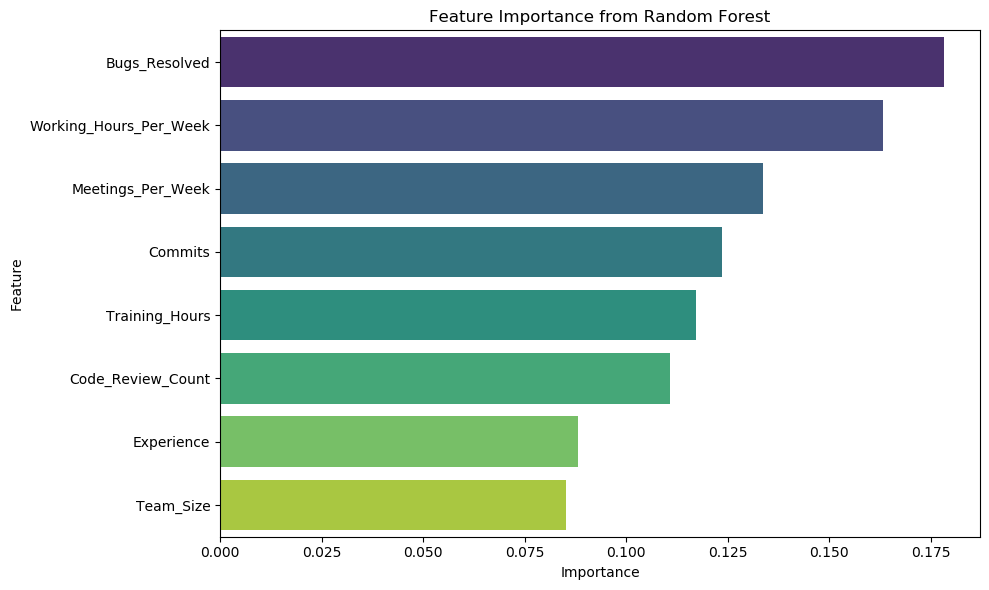

In [37]:
print("\nFeature Importances:")
print(importance_df)

# 11. Plot Feature Importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance from Random Forest')
plt.tight_layout()
plt.show()